In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

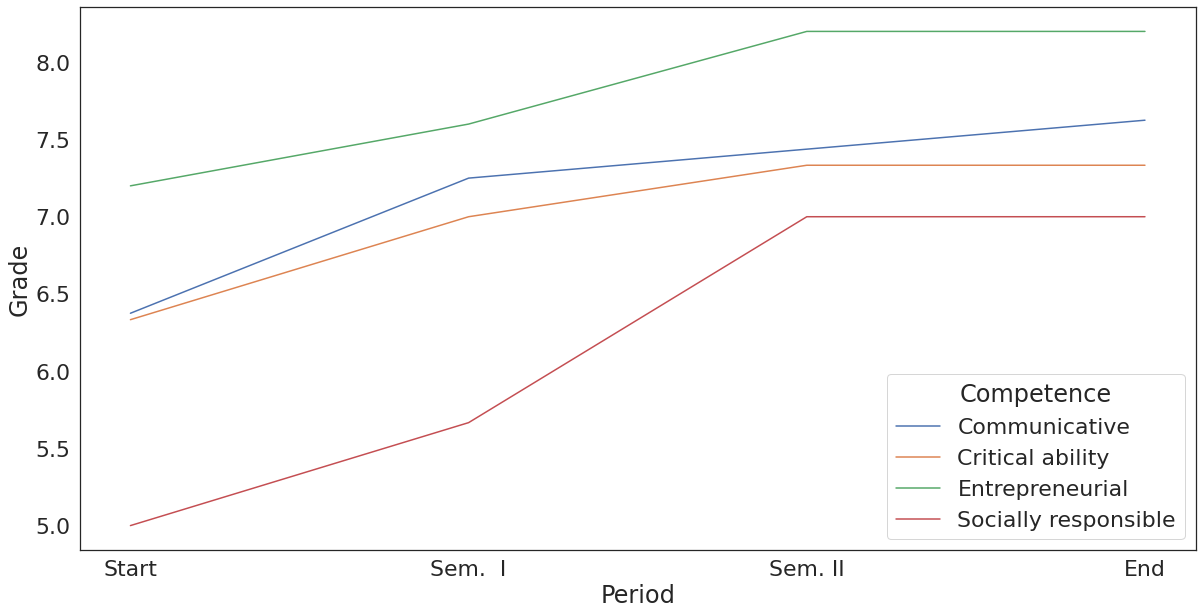

In [86]:
df = pd.read_excel('/home/MarkF/Downloads/Competenties.xlsx',header=2)
df = df[['Start', 'Sem.  I', 'Sem. II', 'End']].dropna(axis=0)
lst = [np.repeat('Critical ability', 6).tolist()]
lst.append(np.repeat('Communicative', 8).tolist())
lst.append(np.repeat('Socially responsible', 3).tolist())
lst.append(np.repeat('Entrepreneurial', 5).tolist())
lst = [food for sublist in lst for food in sublist]
df['Competence'] = lst
df = df.melt(id_vars='Competence')
df.columns = ['Competence', 'Period', 'Grade']
df = df.groupby(['Competence', 'Period']).mean().reset_index()
df['Period'] = pd.Categorical(df['Period'], ['Start', 'Sem.  I', 'Sem. II', 'End'])
sns.set(font_scale=2, style="white")
plt.figure(figsize=(20,10))
sns.lineplot(data=df, x='Period', y='Grade', hue='Competence')
plt.savefig('/home/MarkF/Downloads/Competenties.svg')

In [114]:
df = pd.read_csv('/home/MarkF/DivideConquer/Results/GPL570/All_Cancer/ICARUN/ica_distance_correlation_between_independent_components_consensus.tsv',
           sep=None, index_col=0)

/home/MarkF/.conda/envs/Code/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [17]:
# df_melt = df.reset_index().melt(id_vars='index')
# # df_melt = df_melt.loc[
# #                 pd.DataFrame(np.sort(df_melt[['index', 'variable']], 1), index=df_melt.index).drop_duplicates(
# #                     keep='first').index]
# df_melt = df_melt[df_melt['index'] != df_melt['variable']]
# df_melt.sort_values(by='value')

,index,variable,value
1,consensus independent component 2,consensus independent component 1,0.000000
5735391,consensus independent component 3424,consensus independent component 1519,0.000000
5735390,consensus independent component 3423,consensus independent component 1519,0.000000
5735389,consensus independent component 3422,consensus independent component 1519,0.000000
5735388,consensus independent component 3421,consensus independent component 1519,0.000000
...,...,...,...
13697028,consensus independent component 1477,consensus independent component 3628,0.486101
11047643,consensus independent component 2844,consensus independent component 2926,0.486239
11829317,consensus independent component 2886,consensus independent component 3133,0.490660
13410324,consensus independent component 1749,consensus independent component 3552,0.493350


In [21]:
from tqdm import tqdm
import itertools


In [73]:
score = 1
for x in tqdm(itertools.combinations(df.columns.values, 10)):
    if df.loc[x,x].mean().mean() < score:
        components = x


71984379it [66:48:25, 299.30it/s]


KeyboardInterrupt: 

In [79]:
components_df = pd.read_csv('/home/MarkF/DivideConquer/Results/GPL570/All_Cancer/ICARUN/ica_independent_components_consensus.tsv',
           sep=None, index_col=0)

In [87]:
components_df.loc[:,components].to_csv('/home/MarkF/Downloads/ICA_components.csv')

In [112]:
components_df

,consensus independent component 1,consensus independent component 2,consensus independent component 3,consensus independent component 4,consensus independent component 5,consensus independent component 6,consensus independent component 7,consensus independent component 8,consensus independent component 9,consensus independent component 10,...,consensus independent component 3767,consensus independent component 3768,consensus independent component 3769,consensus independent component 3770,consensus independent component 3771,consensus independent component 3772,consensus independent component 3773,consensus independent component 3774,consensus independent component 3775,consensus independent component 3776
2597,-0.206983,-1.087045,-0.419144,-0.889481,0.625693,-0.464673,-0.266785,0.335350,0.329355,0.328005,...,-0.124341,-0.043934,0.010518,0.201993,-0.032138,-0.208552,-0.169666,-0.053264,-0.235665,-0.515880
60,0.501158,0.165651,-0.625709,0.099027,-0.235955,0.153091,0.342420,0.652732,-0.138754,-0.161564,...,-0.339895,-0.135868,-0.477097,-0.518809,-0.280811,0.738167,0.612575,-0.210716,-0.143924,-0.516572
780,-0.295855,-0.673554,-0.514096,-0.419716,0.326692,0.270067,-1.095456,0.657551,-0.276411,-0.449206,...,-0.358524,0.602649,-0.612340,-0.014035,-0.111275,-0.665454,-0.111068,1.483147,0.528092,-0.751434
3310,-0.571206,-0.934084,-0.074060,0.209428,0.278091,-1.192764,0.226773,0.720999,0.560824,-0.316301,...,-1.196780,-0.176171,-0.761097,1.120299,0.322568,0.316849,0.347677,-0.156861,0.988438,0.125578
2978,0.285105,0.301577,0.516902,-1.157371,0.426159,0.546608,-0.411458,0.281219,0.617270,0.553020,...,0.094136,0.096030,0.004972,0.110158,-0.306669,0.351177,-0.178490,-0.354931,-0.709588,0.045500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338579,-0.627380,-0.545751,-0.535060,0.331857,0.679470,0.278708,-0.095643,-0.484165,0.639419,0.922103,...,0.405251,0.214567,-0.112141,0.481168,-0.195576,-0.416594,0.753269,2.394521,0.223083,0.564580
417,-0.410729,-0.450551,-0.418784,-0.073684,-0.108203,-0.599870,0.074917,0.418770,1.174545,0.419099,...,-0.049008,-0.087038,0.606988,0.764175,-0.184423,0.301883,-0.542490,0.205179,-0.109421,0.944297
83734,-0.419421,-3.083842,0.561394,-0.763441,-0.373096,-0.414449,-0.217648,0.292672,-0.947950,-1.414624,...,-1.273787,-0.474698,-0.590196,-3.675771,0.897083,1.734228,0.055581,-0.324258,0.409209,-0.496618
400759,0.117069,1.311618,0.059919,-0.186525,-0.515730,0.052284,0.060728,98.116995,0.064952,0.524978,...,0.840841,0.269048,0.655446,-0.668998,0.242922,0.072825,-0.108161,0.241519,0.283906,-0.684426


In [117]:
df.loc[components,components]

,consensus independent component 1,consensus independent component 2,consensus independent component 3,consensus independent component 4,consensus independent component 5,consensus independent component 6,consensus independent component 7,consensus independent component 18,consensus independent component 348,consensus independent component 1745
consensus independent component 1,1,0.021145,0.023872,0.021963,0.024631,0.019691,0.022632,0.020098,0.024317,0.022654
consensus independent component 2,0,1.000000,0.023659,0.030718,0.025608,0.026461,0.025121,0.022559,0.027641,0.026704
consensus independent component 3,0,0.000000,1.000000,0.021887,0.028425,0.024708,0.025190,0.023089,0.045371,0.023950
consensus independent component 4,0,0.000000,0.000000,1.000000,0.026869,0.025698,0.023713,0.022857,0.027591,0.027005
consensus independent component 5,0,0.000000,0.000000,0.000000,1.000000,0.023997,0.028568,0.027240,0.032097,0.027046
consensus independent component 6,0,0.000000,0.000000,0.000000,0.000000,1.000000,0.019643,0.021531,0.021147,0.019808
consensus independent component 7,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.027032,0.027000,0.031270
consensus independent component 18,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.033221,0.025480
consensus independent component 348,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.023507
consensus independent component 1745,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [110]:
#Get the enrichements and loop over every group to see for every component if it is enriched
count = {}
active_components = []
cna_components = []
paths = [('GOBP', 'enrichment_matrix_Gene Ontology - Biolocal Processes.tsv'),
         ('HALLMARK', 'enrichment_matrix_Hallmark.tsv'),
         ('REACTOME','enrichment_matrix_Reactome.tsv')]
# Loop over the GSEA
for path in paths:
    # Load it in and remove the link
    gsea_df = pd.read_csv(f'/home/MarkF/DivideConquer/Results/GPL570/All_Cancer/GSEA/{path[1]}',
                     sep='\t', index_col=0)
    gsea_df.index = [x.split(' -- ')[0].replace(f'{path[0]}_','') for x in gsea_df.index]
    gsea_df = gsea_df.abs()
    # Get the significant genesets (Score higher than 4) and put these esimated sources in a list
    gsea_df = gsea_df > 4
    gsea_df = gsea_df.sum()
    gsea_df = gsea_df[gsea_df > 0]
    active_components.extend(list(gsea_df.index))
# Check if there are any CNA in the components
cna_df = pd.read_csv(f'/home/MarkF/DivideConquer/Results/GPL570/All_Cancer/CNA_TC'
                     '/_extreme_valued_regions_all_chromosomes.txt', sep='\t')
cna_df = cna_df[cna_df['extreme_value_region_status'] != 0]
cna_df = cna_df[cna_df['mappings_in_region'] >= 10]
# Only leave the ones that are in the non-appearning group
cna_components.extend(list(cna_df['name']))
# Only leave the unique values and count them
active_components = set(active_components)
cna_components = set(cna_components)
# The only enriched
count[f'Enriched'] = len(active_components.difference(cna_components))
# The only CNA
count[f'CNA'] = len(cna_components.difference(active_components))
# Both enriched and CNA
count['CNA and Enriched'] = len(active_components.intersection(cna_components))
count = pd.DataFrame(count, index=['Sample dataset'])
count['Biological function'] = count['Enriched'] + count['CNA'] + count['CNA and Enriched']
count = count[['Enriched', 'CNA', 'CNA and Enriched']]

In [111]:
count

,Enriched,CNA,CNA and Enriched
Sample dataset,292,1941,519
